<a href="https://colab.research.google.com/github/ChandiniKS/Machine-learning4/blob/main/insurance_prediction_using_Logistic_regression87ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
data=pd.read_csv('/content/insurance2.csv')

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [15]:
#checking for missing values

In [16]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [17]:
#dropping irrelevant column

In [18]:
data1=data.drop(['charges'],axis=1)

In [19]:
import matplotlib.pyplot as plt

In [ ]:
#checking for outliers

<Axes: >

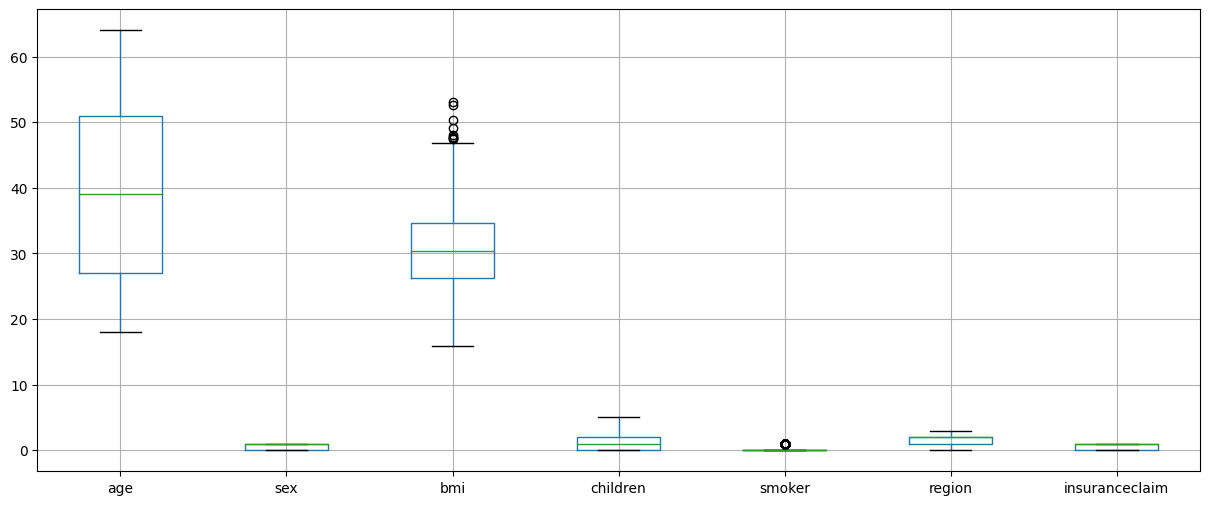

In [20]:
data1.boxplot(figsize=(15,6))

<Axes: >

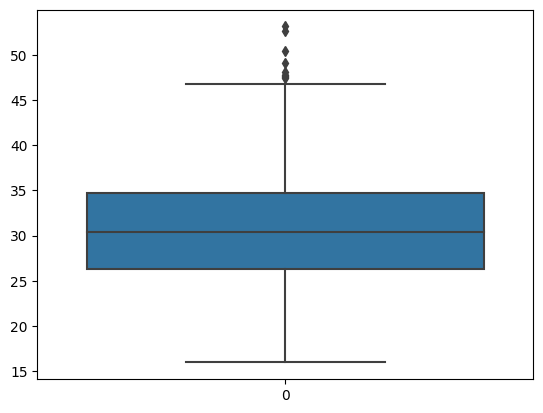

In [21]:
sns.boxplot(data1['bmi'])

In [22]:
percentile25= data1['bmi'].quantile(0.25)
percentile75= data1['bmi'].quantile(0.75)

In [24]:
IQR= percentile75-percentile25

In [25]:
upper_limit=percentile75+1.5*IQR

In [26]:
data1=data1[data1['bmi']<upper_limit]

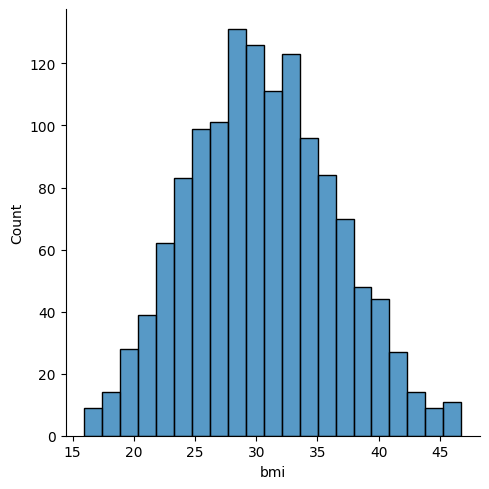

In [27]:
sns.displot(data1['bmi'])

<Axes: >

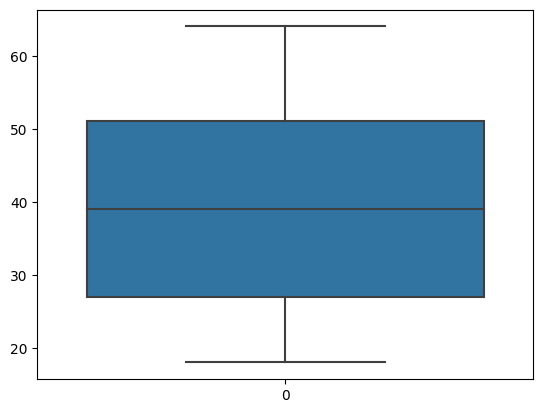

In [28]:
sns.boxplot(data1['age'])

In [ ]:
#visuaising the correlation between the variables in the dataset

<Axes: >

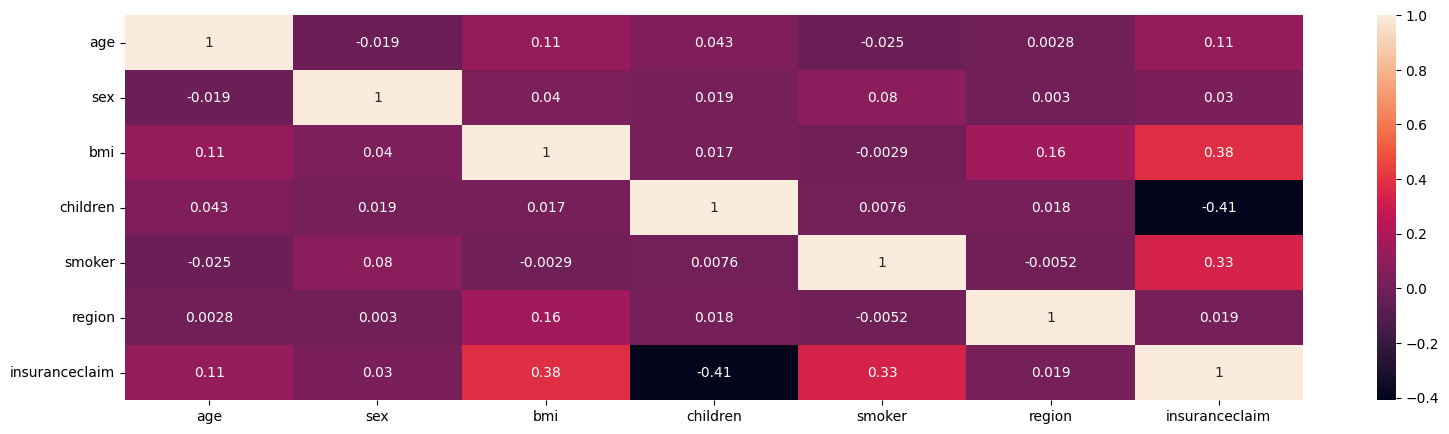

In [30]:
plt.figure(figsize=(19,5))
sns.heatmap(data1.corr(),annot=True)

In [32]:
data1.corr()

,age,sex,bmi,children,smoker,region,insuranceclaim
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.114212
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.029896
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.380024
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,-0.410093
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.333894
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,0.019047
insuranceclaim,0.114212,0.029896,0.380024,-0.410093,0.333894,0.019047,1.000000


In [ ]:
#Deviding the dataset as dependent and independent variable

In [33]:
x=data1.iloc[:,:6]

In [37]:
y=data1.iloc[:,-1]

In [40]:
#Devidng the data as traininig and testing data

In [41]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.8)

In [48]:
#Data Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
x_train = scaler.fit_transform(x_train)

In [52]:
x_test = scaler.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
#training the model

In [54]:
LR.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_predict= LR.predict(x_test)

In [ ]:
#checing the accuracy of the model

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
confusion_matrix(y_test,y_predict)

array([[ 92,  20],
       [ 13, 140]])

In [58]:
accuracy_score(y_test,y_predict)

0.8754716981132076